Introduction au sujet étudié :

Le cancer est l'une des principales causes de décès dans le monde, c'est pourquoi un diagnostic précoce et correct est essentiel. Avec le développement de l'intelligence artificielle dans de nombreux domaines, elle est devenue un outil utile pour identifier les maladies, y compris le cancer. Ce projet utilisera l'apprentissage automatique pour distinguer les cellules cancéreuses en groupes bénins (non nocifs) et malins (nocifs). Nous disposons d'un ensemble de données détaillé que nous utiliserons pour créer un outil fiable pouvant aider les médecins à diagnostiquer correctement le cancer de manière opportune.

Problématique du dataset étudié :

La tâche consiste à identifier correctement les cellules cancéreuses comme bénignes ou malignes. Cela est crucial pour l'élaboration du plan de traitement et la compréhension de l'évolution de la maladie. Une identification incorrecte peut entraîner un traitement inutile ou insuffisant, les deux pouvant avoir des effets graves sur la santé et la survie du patient. Cependant, en raison des nombreux détails des cellules cancéreuses et des différences subtiles entre les cellules bénignes et malignes, cela n'est pas une tâche facile.

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import train_test_split
from sklearn import preprocessing,metrics
plt.style.use('seaborn-v0_8')
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import FitFailedWarning

Description du Dataset :

Le jeu de données est une collection détaillée de 570 échantillons axés sur l'étude des cellules cancéreuses. Chaque échantillon comporte 30 caractéristiques uniques, ce qui en fait une excellente source pour comprendre les comportements cellulaires et déceler des motifs significatifs. Les caractéristiques sont soigneusement sélectionnées et fournissent des indices solides permettant de distinguer les deux types de cellules cancéreuses sur lesquels nous nous concentrons : bénignes et malignes. Les cellules cancéreuses bénignes sont non invasives et ont moins de probabilité de se propager, tandis que les cellules malignes sont plus agressives et ont plus de chances de se propager à d'autres parties du corps. Ce jeu de données, avec sa gamme étendue de caractéristiques, constitue une base solide pour construire un outil d'apprentissage automatique hautement précis pour l'identification des cellules cancéreuses.


Traitement et nettoyage des données

In [3]:
data = pd.read_csv('C:/Users/HP/Classif/Cancer_Data.csv')
df = pd.DataFrame(data)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
df=df.drop(['id','Unnamed: 32'],axis=1)
print(df.shape)
df.head()

(569, 31)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Remarques :

-Les valeurs "Untitled: 32" et "id" sont redondantes pour l'ensemble de données. Elles peuvent être manipulées dans le modèle que nous allons entraîner. 

-Une structure composée entièrement de valeurs nulles, comme "Unnamed: 32", pourrait créer une marge d'erreur pour nous à l'avenir.

Analyse exploratoire des données

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


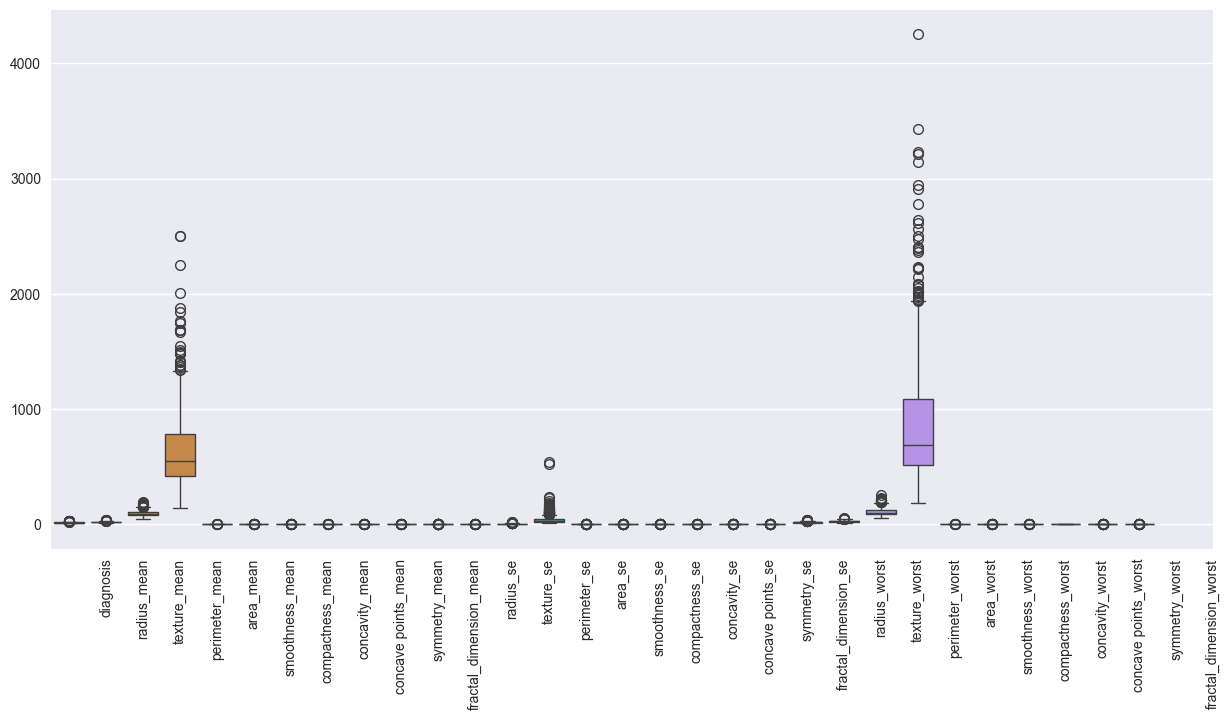

In [7]:
plt.figure(figsize=(15,7))
x_range=list(np.arange(1,32))
print(x_range)
x_names=list(df.columns)
print(x_names)
sns.boxplot(df)
plt.xticks(x_range, x_names,
       rotation=90)
plt.show()

Remarques :

1-Texture_mean et Texture_worst :

-Les boîtes de "texture_mean" et "texture_worst" présentent une grande étendue, indiquant une dispersion importante des données dans ces deux caractéristiques.

-Un grand nombre de points à l'extrémité des moustaches suggère la présence de valeurs aberrantes ou extrêmes dans ces deux colonnes.

-Les médianes de "texture_mean" et "texture_worst" ne sont pas proches du centre de leurs boîtes, suggérant une asymétrie dans la distribution des données.

2-Autres Caractéristiques :

-Les autres colonnes semblent avoir une distribution similaire, avec des boîtes plus compactes et des moustaches de longueur modérée.

-La médiane de ces colonnes semble être plus centrée dans la boîte, indiquant une symétrie ou une distribution plus équilibrée.

Analyse de corrélation

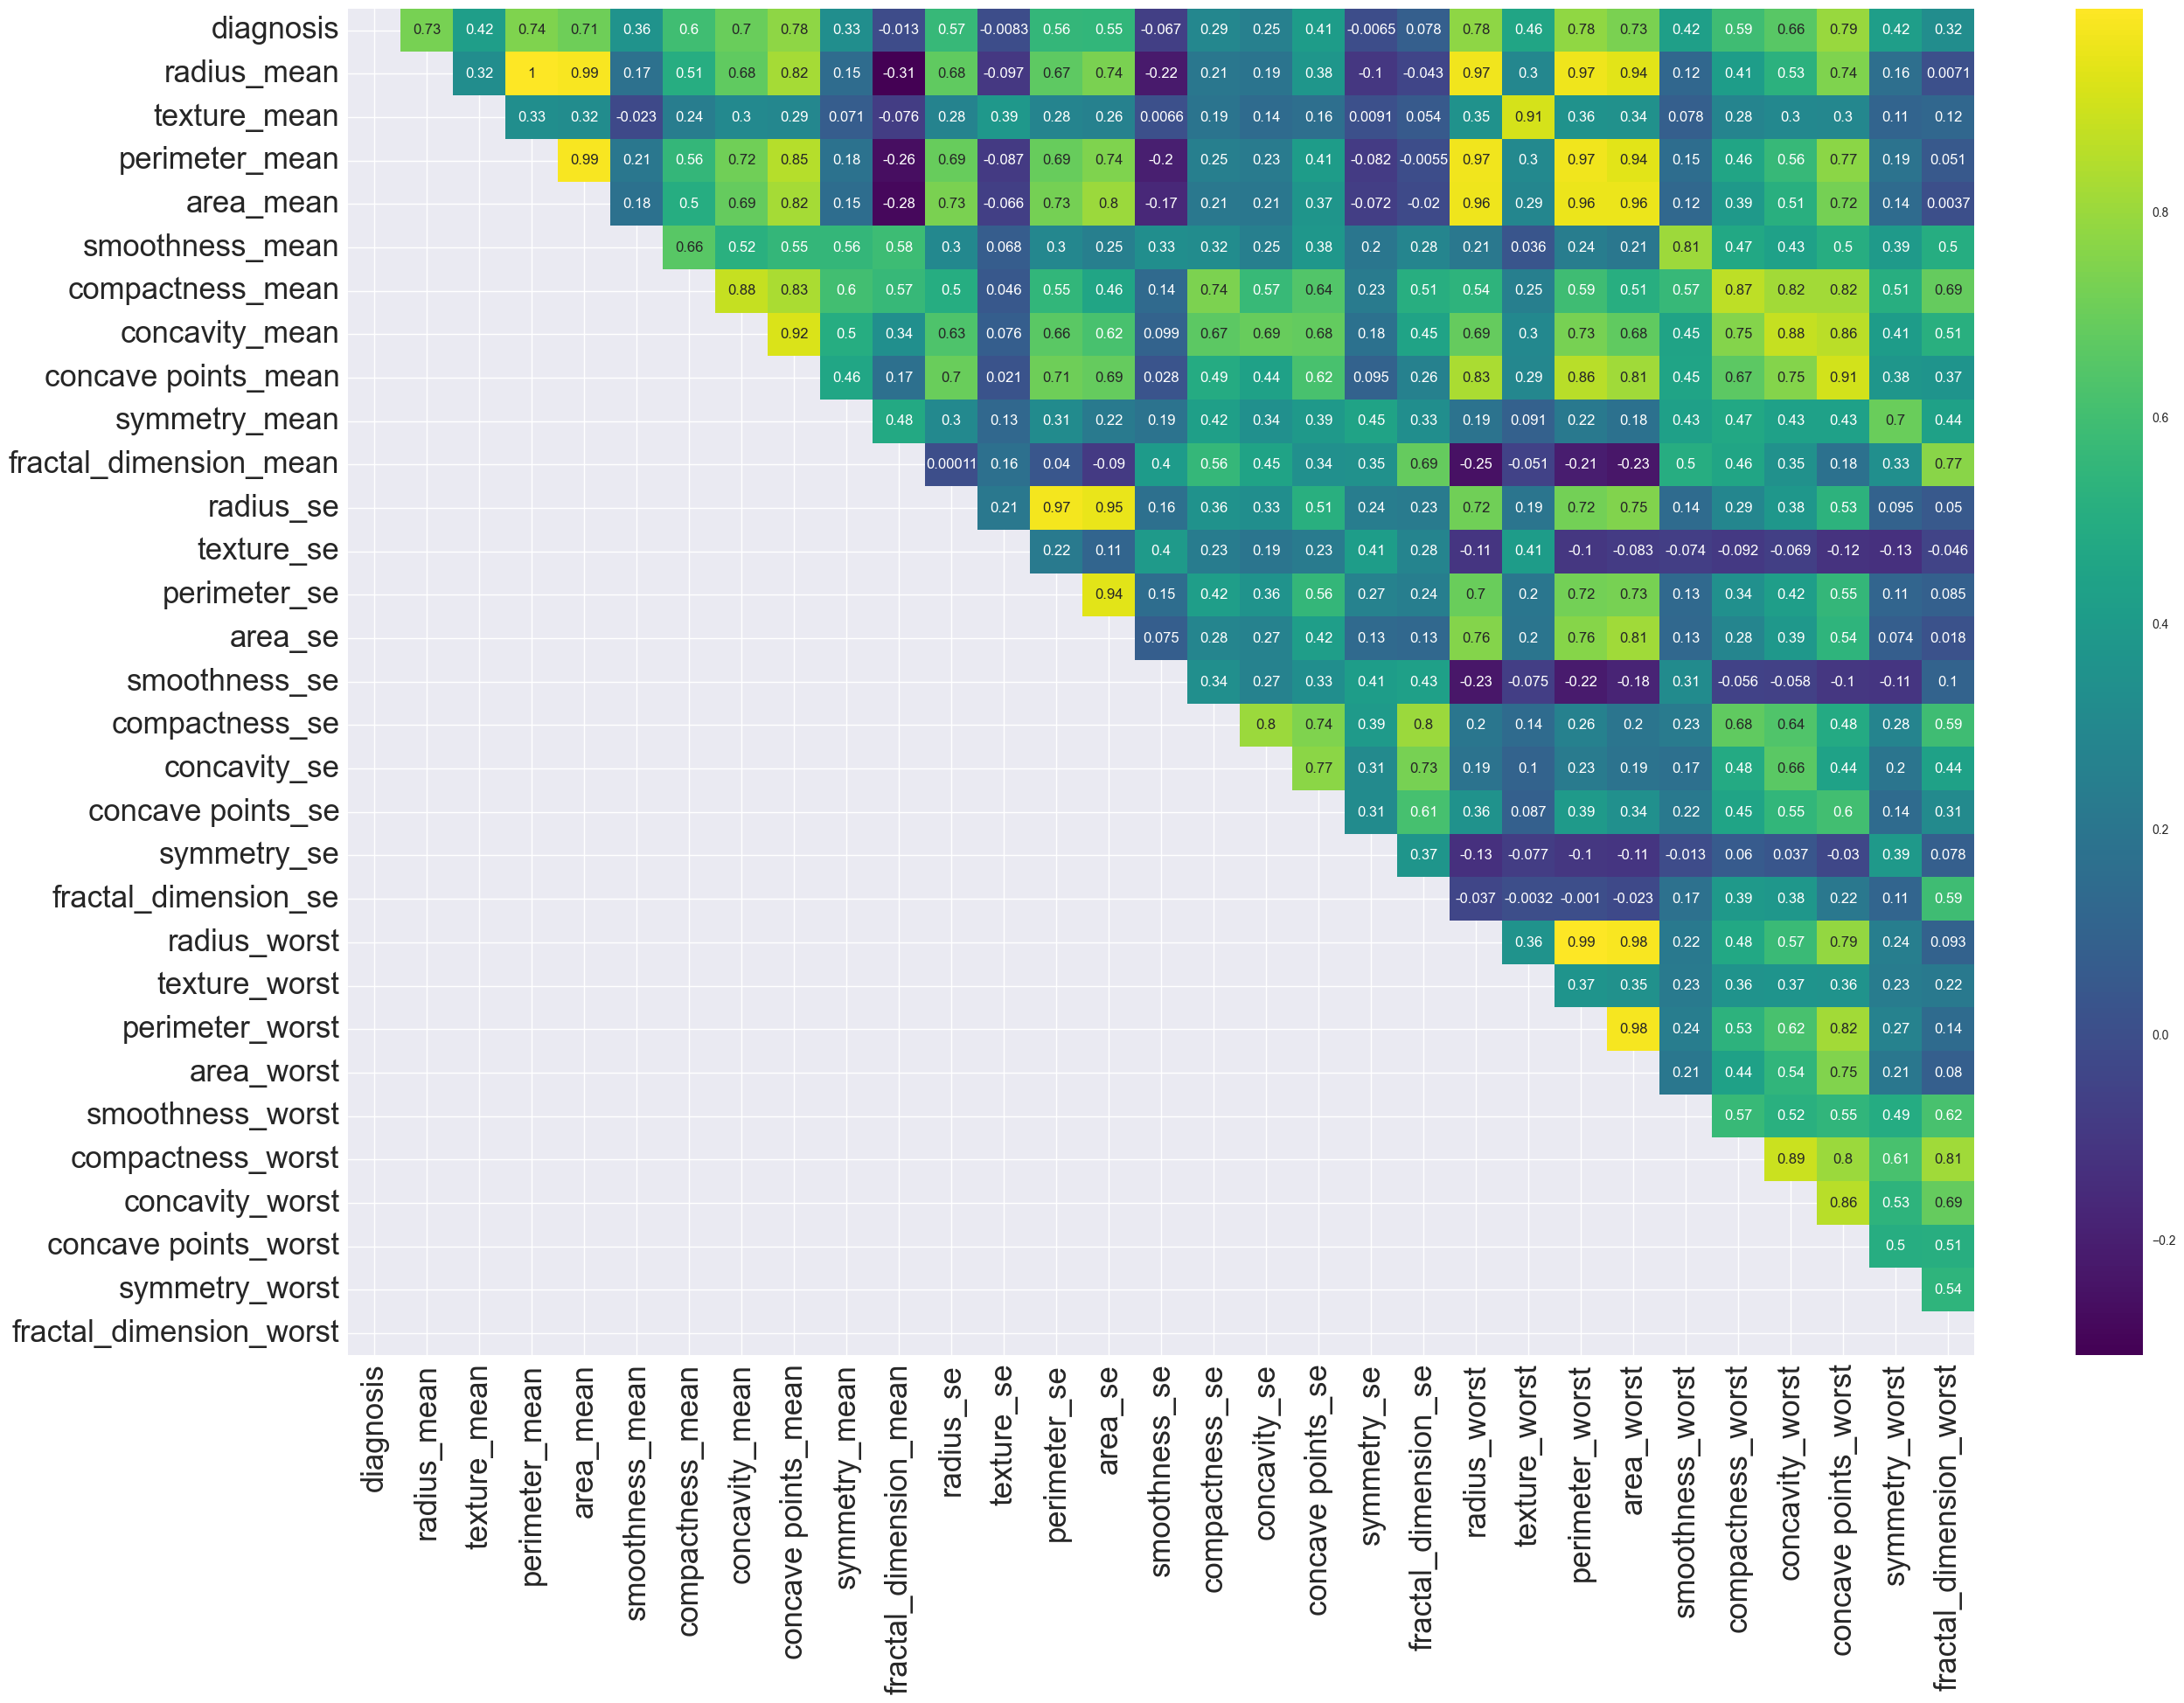

In [8]:
df['diagnosis'] = df['diagnosis'].replace({'M' : 1 , 'B' : 0})
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),cmap='viridis',annot=True,mask = np.tril(np.ones_like(df.corr(), dtype=bool)))
plt.xticks(fontsize=25,rotation=90)
plt.yticks(fontsize=25,rotation=0)
plt.show()

Les objets ne sont pas utilisés dans la modélisation, nous les convertissons donc en type numérique. Étant donné que nous appliquerons un processus de normalisation à l'ensemble des données, cela nous donne un résultat plus adapté où les données à classifier sont constituées de 1 et de 0.

Analyse de la variable cible catégorielle

diagnosis
0    357
1    212
Name: count, dtype: int64

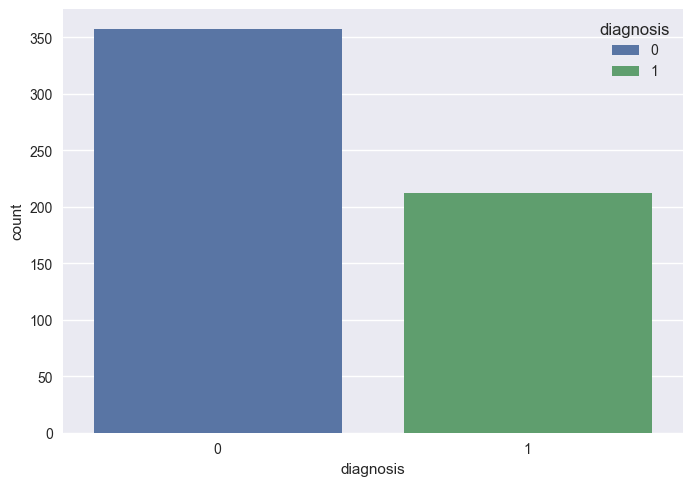

In [9]:
sns.countplot(x='diagnosis',hue='diagnosis',data = df)
df['diagnosis'].value_counts()


En se basant sur l'analyse ci-dessus, on peut constater que :

-Les données sont déjà prétraitées.

-Toutes les caractéristiques sont continues, mais la variable cible est discrète (nous pouvons donc utiliser des algorithmes de classification, et pour Naive Bayes, nous pouvons utiliser la distribution gaussienne).

-Il n'y a pas de valeurs nulles, ce qui explique que les données ont été prétraitées auparavant.

-Il y a de nombreuses caractéristiques, mais le nombre d'échantillons de données est faible, ce qui rend le travail plus difficile.

-La variable cible est déséquilibrée, mais on peut constater que plus les valeurs sont élevées, plus il y a de chances que le type de cancer soit "MALIGNANT".

-La corrélation entre la plupart des caractéristiques est élevée.

==> Par conséquent, pas de modification des données 
==> Création des modèles avec l'ensemble de données inchangé.

Normalisation des données

In [10]:
df['diagnosis'] = df['diagnosis'].replace({'M' : 1 , 'B' : 0})
scaler = preprocessing.StandardScaler()
X = df.drop(columns = 'diagnosis').values
X = scaler.fit_transform(X)
Y = df['diagnosis'].values.reshape(-1,1)
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)


Comparaison des courbes ROC, AUC et du score F1

In [11]:
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier

On fait cela pour comprendre quels modèles performent mieux avec leurs valeurs par défaut, afin que je puisse décider quel modèle utiliser.

In [12]:
models = [LogisticRegression(random_state=42),KNeighborsClassifier(),
          SVC(probability=True, random_state=42),GaussianNB(),
          DecisionTreeClassifier(random_state=42),RandomForestClassifier(random_state=42),xgb.XGBClassifier(),AdaBoostClassifier()]
model_names = ['LogisticRegression','KNN','SVM','NaiveBayes','DecisionTree','RandomForest','XGBoost','AdaBoostClassifier']
auc_scores = []

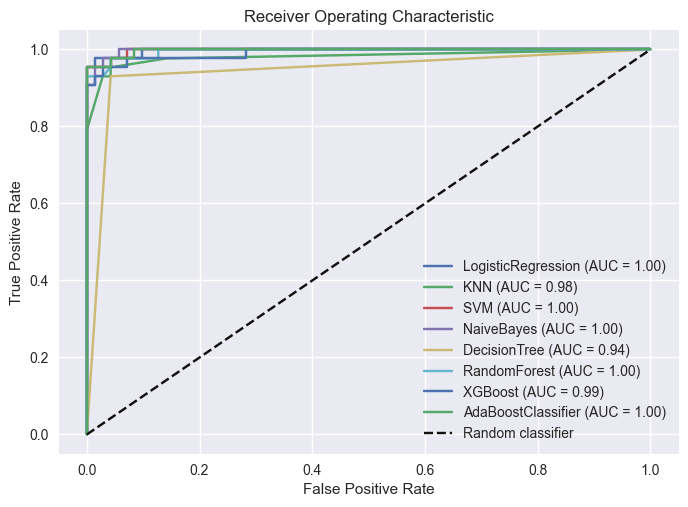

In [19]:
for model,name in zip(models,model_names): 
    model.fit(x_train,y_train.ravel())
    y_pred_prob = model.predict_proba(x_test)[:, 1]
    fpr,tpr,thresholds = roc_curve(y_test.ravel(),y_pred_prob)
    auc_score = auc(fpr,tpr)
    auc_scores.append(auc_score)
    plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (name, auc_score))
    
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score
f1_scores = []
recall = []
precision = []

for model, name in zip(models, model_names):
    model.fit(x_train, y_train.ravel())
    y_pred = model.predict(x_test)
    f1 = f1_score(y_test.ravel(), y_pred)
    r = recall_score(y_test.ravel(),y_pred)
    p = precision_score(y_test.ravel(),y_pred)
    f1_scores.append(f1)
    recall.append(r)
    precision.append(p)
    print('%s: F1-score = %0.3f' % (name, f1))
    print('%s: Precision = %0.3f' % (name, p))
    print('%s: Recall = %0.3f' % (name, r))
    print('\n')
average_f1_score = sum(f1_scores) / len(f1_scores)
print('Average F1-score:', average_f1_score)

LogisticRegression: F1-score = 0.965
LogisticRegression: Precision = 0.976
LogisticRegression: Recall = 0.953


KNN: F1-score = 0.930
KNN: Precision = 0.930
KNN: Recall = 0.930


SVM: F1-score = 0.965
SVM: Precision = 0.976
SVM: Recall = 0.953


NaiveBayes: F1-score = 0.952
NaiveBayes: Precision = 0.976
NaiveBayes: Recall = 0.930


DecisionTree: F1-score = 0.930
DecisionTree: Precision = 0.930
DecisionTree: Recall = 0.930


RandomForest: F1-score = 0.952
RandomForest: Precision = 0.976
RandomForest: Recall = 0.930


XGBoost: F1-score = 0.941
XGBoost: Precision = 0.952
XGBoost: Recall = 0.930


AdaBoostClassifier: F1-score = 0.965
AdaBoostClassifier: Precision = 0.976
AdaBoostClassifier: Recall = 0.953


Average F1-score: 0.9500651423360043


On peut voir que la régression logistique, le SVM et AdaBoost ont les meilleurs scores. Nous continuons donc à créer des modèles en nous basant sur ces informations.

Création de modèles

In [15]:
from sklearn.model_selection import GridSearchCV

SVM = SVC()

C = [0.1,1,10,100]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']

params = {'C':C,'kernel':kernel}

SVM_grid = GridSearchCV(estimator = SVM,param_grid = params,refit= True,verbose = 0,n_jobs=-1)
SVM_grid.fit(x_train,y_train.ravel())
print(f"best parameters : {SVM_grid.best_params_}")
print(f"best score : {SVM_grid.best_score_}")

best parameters : {'C': 0.1, 'kernel': 'linear'}
best score : 0.9758241758241759


In [27]:
warnings.filterwarnings("ignore", category=FitFailedWarning)
LogReg = LogisticRegression(max_iter=10000)

penalty = ['l1','l2','elasticnet']
solver = [ 'newton-cg', 'lbfgs', 'liblinear', 'sag','saga']
C = [0.001, 0.01, 0.1, 1, 10, 100]

params2 = {'C' : C ,'penalty' : penalty , 'solver' : solver }


LogReg_grid = GridSearchCV(estimator = LogReg,param_grid = params2 ,refit= True,verbose = 0,n_jobs=-1,error_score='raise')
try:
    LogReg_grid.fit(x_train,y_train.ravel())
    print(f"best parameters : {LogReg_grid.best_params_}")
    print(f"best score : {LogReg_grid.best_score_}")
except Exception as e:
    print(f"An exception occurred: {str(e)}")

An exception occurred: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.


In [28]:
warnings.filterwarnings("ignore", category=FitFailedWarning)
AdaBoost = AdaBoostClassifier()

estimator = [DecisionTreeClassifier(), SVC(), LogisticRegression(), GaussianNB(), KNeighborsClassifier()]
n_estimators = range(50,500,50)
learning_rate = np.arange(0.1, 1.1, 0.1)
algorithm = ['SAMME','SAMME.R']

params3 = {'estimator': estimator , 'n_estimators' : n_estimators , 'learning_rate' : learning_rate  ,'algorithm' : algorithm }

AdaBoostGrid = GridSearchCV(estimator=AdaBoost , param_grid=params3 , refit= True,verbose = 0,n_jobs=-1,error_score='raise')
try:
    AdaBoostGrid.fit(x_train,y_train.ravel())
    print(f"best parameters : {AdaBoostGrid.best_params_}")
    print(f"best score : {AdaBoostGrid.best_score_}")
except Exception as e:
    print(f"An exception occurred: {str(e)}")

An exception occurred: KNeighborsClassifier doesn't support sample_weight.



Le modèle final

Comme on peut  le constater, la régression logistique était le modèle le meilleur et le plus efficace, nous l'utilisons donc comme modèle final.


accuracy  : 0.9912280701754386 

f1 score  : 0.988235294117647 

classification report :
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        71
           1       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114
 

The Confusion Matrix : 



0.9912280701754386

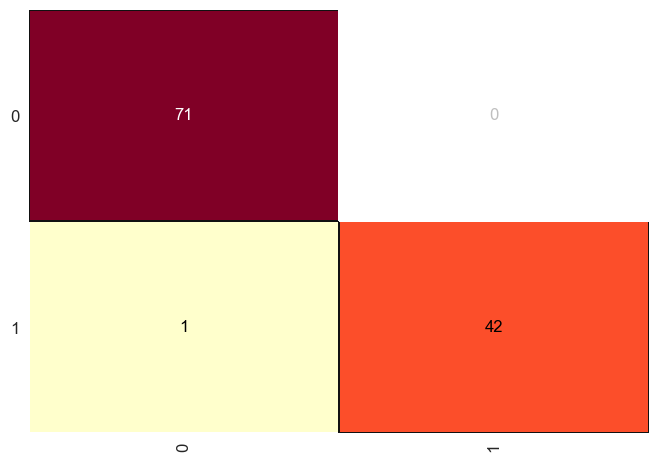

In [17]:
LogReg = LogisticRegression(solver='liblinear' , C = 0.1 , penalty = 'l2')
LogReg.fit(x_train,y_train.ravel())
y_pred = LogReg.predict(x_test)

print(f"accuracy  : {metrics.accuracy_score(y_test,y_pred)} \n")
print(f"f1 score  : {metrics.f1_score(y_test,y_pred)} \n")
print(f"classification report :\n {metrics.classification_report(y_test,y_pred)} \n")
print('The Confusion Matrix : \n')
cm = ConfusionMatrix(LogReg)
cm.fit(x_train,y_train)
cm.score(x_test,y_test)